### Access libraries that will be used

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

### Load file into data frame and inspect for adequacy

In [2]:
pd.set_option('display.max_rows', None)
magic=pd.read_csv(r'p:\\stats.csv')
magic.head()

,FirstName,LastName,Age,Pos,Date,H/A,Opp,W/L,GmSc,GS,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM
0,Nikola,Vucevic,30-084,C,1/16/2021,@,BRK,L,33.1,1,...,4,6,10,7,5,0,4,4,34,18.5
1,Nikola,Vucevic,30-066,C,12/29/2020,@,OKC,W,27.9,1,...,3,7,10,5,1,0,1,0,28,13.7
2,Nikola,Vucevic,30-077,C,1/9/2021,@,DAL,L,26.7,1,...,3,12,15,2,2,0,0,3,30,14.5
3,Nikola,Vucevic,30-070,C,1/2/2021,NaN,OKC,L,25.2,1,...,2,11,13,2,0,0,1,1,30,13.0
4,Nikola,Vucevic,30-072,C,1/4/2021,NaN,CLE,W,24.1,1,...,2,6,8,2,2,3,0,0,23,18.8


In [3]:
magic.tail()

,FirstName,LastName,Age,Pos,Date,H/A,Opp,W/L,GmSc,GS,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM
175,Michael,Carter-Williams,29-086,G,1/4/2021,NaN,CLE,W,-2.1,1,...,1,0,1,3,0,1,2,2,0,-11.8
176,Gary,Clark,26-053,F,1/8/2021,@,HOU,L,-2.6,1,...,0,4,4,0,0,1,2,1,0,-15.8
177,Gary,Clark,26-063,F,1/18/2021,@,NYK,L,-2.6,0,...,0,2,2,0,0,1,0,1,0,-15.3
178,Dwayne,Bacon,25-141,G,1/18/2021,@,NYK,L,-4.5,1,...,0,1,1,1,0,0,1,5,2,-18.3
179,Dwayne,Bacon,25-147,G,1/24/2021,NaN,CHO,L,-4.8,0,...,0,3,3,2,0,0,3,4,2,-26.7


### Display data using histogram, swarmplot, and boxplot

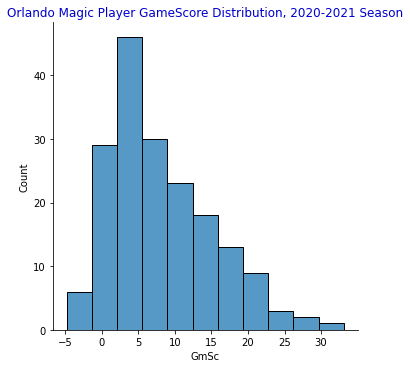

In [4]:
sns.displot(magic['GmSc'])
plt.title("Orlando Magic Player GameScore Distribution, 2020-2021 Season", color='mediumblue')
plt.show()

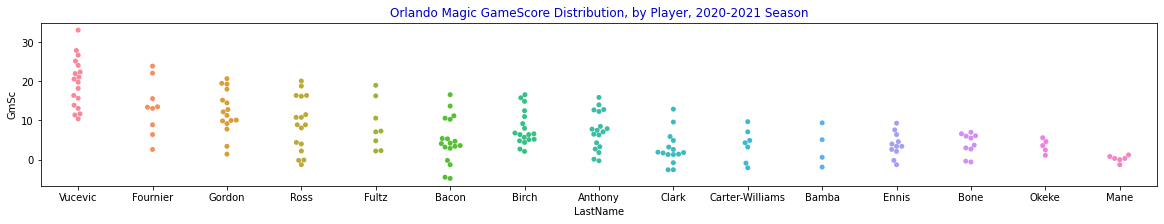

In [5]:
fig, ax = plt.subplots(figsize=(20,3))
sns.swarmplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Player, 2020-2021 Season", color='mediumblue')
plt.show()

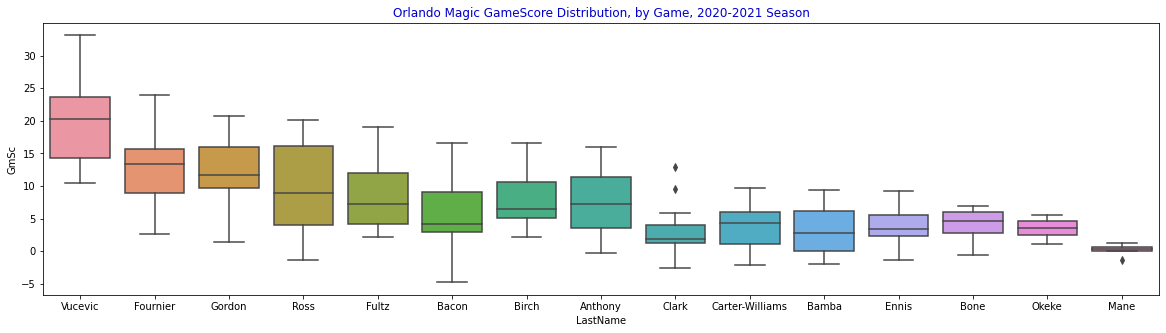

In [6]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Game, 2020-2021 Season", color='mediumblue')
plt.show()

GameScore versus Minutes Played, by Player


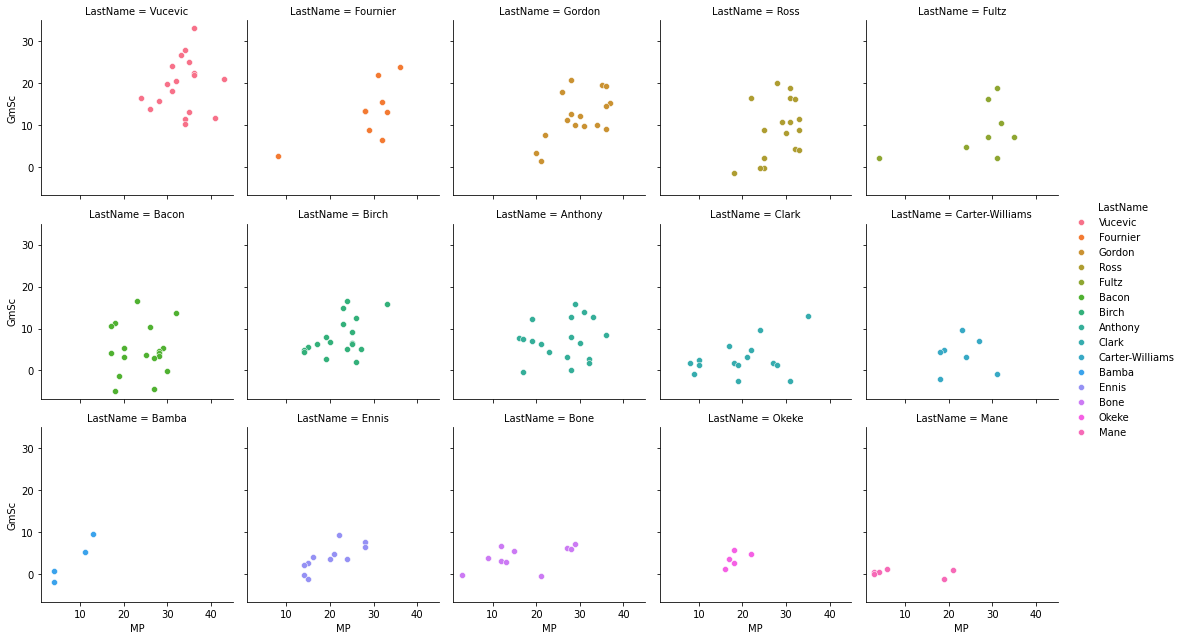

In [7]:
grid = sns.FacetGrid(magic, col = 'LastName', hue = 'LastName', col_wrap=5)
grid.map(sns.scatterplot, 'MP', 'GmSc')
grid.add_legend()
print ("\033[1m"+(colored("GameScore versus Minutes Played, by Player", 'blue'))+"\033[0m")
plt.show() 
# Minutes played on x-axis, GameScore on y-axis

c:\software\wpy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\axisgrid.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


GameScore versus Date Game Played, by GmSc Rank


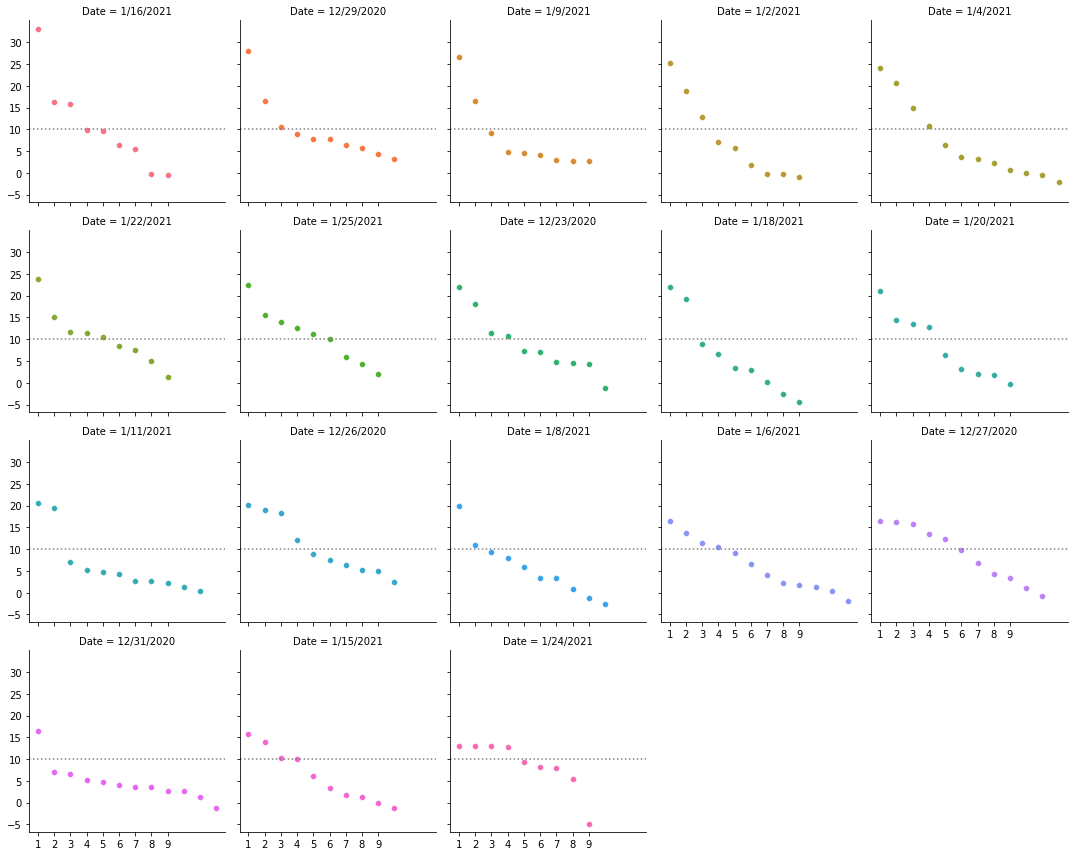

In [9]:
grid = sns.FacetGrid(magic, col = 'Date', hue = 'Date', col_wrap=5)
grid.map(sns.scatterplot, 'LastName', 'GmSc')
grid.set(xlabel="Player", ylabel="GameScore")
grid.set(xticklabels=[1,2,3,4,5,6,7,8,9,10,11])
grid.map(plt.axhline, y=10, ls=":", c=".5")
print ("\033[1m"+(colored("GameScore versus Date Game Played, by GmSc Rank", 'blue'))+"\033[0m")
plt.show() 
# x-axis shows highest GmSc on left, lowest on right for each game. Games ordered by highest game score (in the #1 position on x-axis)
# GmSc of >= 10 are considered above average performace. Points above the dashed line are 'above average'performances.

### Calculate each player's average gamescore, standard dev., and quartiles

In [10]:
print ("\033[1m"+(colored("Descriptive Statistics for GameScore, by Player", 'blue'))+"\033[0m")
magic[['LastName','GmSc']].\
groupby(['LastName'], as_index=True).describe()

Descriptive Statistics for GameScore, by Player


GmSc                                                        
                count       mean       std   min     25%    50%     75%   max
LastName                                                                     
Anthony          18.0   7.288889  4.808313  -0.3   3.550   7.30  11.350  15.9
Bacon            18.0   4.911111  5.815688  -4.8   2.975   4.15   9.075  16.6
Bamba             4.0   3.300000  4.992661  -1.9  -0.025   2.85   6.175   9.4
Birch            18.0   8.011111  4.400921   2.1   5.125   6.50  10.550  16.6
Bone             10.0   3.960000  2.782964  -0.6   2.775   4.60   6.075   7.0
Carter-Williams   7.0   3.742857  4.171274  -2.1   1.150   4.30   6.000   9.7
Clark            15.0   2.833333  4.168019  -2.6   1.300   1.80   4.050  12.9
Ennis            11.0   3.809091  3.143073  -1.3   2.350   3.40   5.500   9.3
Fournier          9.0  13.277778  6.861446   2.6   8.900  13.40  15.600  23.9
Fultz             8.0   8.700000  6.215189   2.2   4.175   7.20  12.025  19.0
Gordon           16.0  12.206250  5.549951   1.4   9.725  11.75  15.900  20.7
Mane              6.0   0.216667  0.856543  -1.3   0.075   0.30   0.675   1.2
Okeke             5.0   3.480000  1.759830   1.1   2.500   3.60   4.600   5.6
Ross             17.0   9.170588  6.890280  -1.3   4.000   8.90  16.200  20.1
Vucevic          18.0  19.650000  6.354457  10.4  14.350  20.20  23.675  33.1

In [11]:
print ("\033[1m"+(colored("Total Season GameScore, by Player", 'blue'))+"\033[0m")
game_score = magic[['GmSc','LastName']].groupby(['LastName'], as_index=True).sum()
sort_game_score = game_score.sort_values(by=['GmSc'], ascending=False)
print(sort_game_score)

Total Season GameScore, by Player
                  GmSc
LastName              
Vucevic          353.7
Gordon           195.3
Ross             155.9
Birch            144.2
Anthony          131.2
Fournier         119.5
Bacon             88.4
Fultz             69.6
Clark             42.5
Ennis             41.9
Bone              39.6
Carter-Williams   26.2
Okeke             17.4
Bamba             13.2
Mane               1.3
